In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

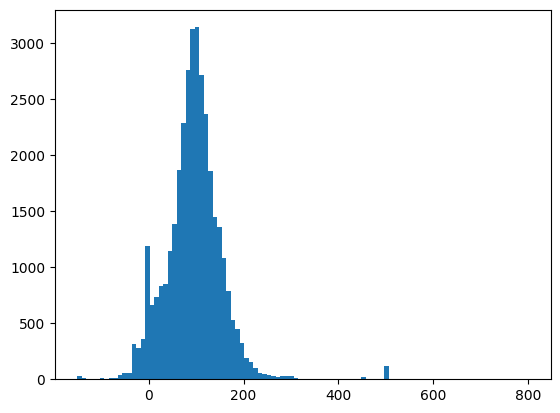

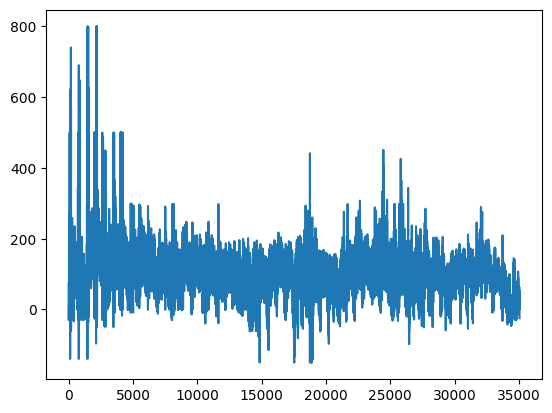

,Day-ahead Price [EUR/MWh],Currency,BZN|DE-LU,Startdate,Enddate
0,75.01,EUR,NaN,2023-01-01 00:00:00,2023-01-01 00:15:00
1,-29.95,EUR,NaN,2023-01-01 00:15:00,2023-01-01 00:30:00
2,-29.98,EUR,NaN,2023-01-01 00:30:00,2023-01-01 00:45:00
3,-30.00,EUR,NaN,2023-01-01 00:45:00,2023-01-01 01:00:00
4,26.81,EUR,NaN,2023-01-01 01:00:00,2023-01-01 01:15:00
...,...,...,...,...,...
35039,-12.42,EUR,NaN,2023-12-31 22:45:00,2023-12-31 23:00:00
35040,49.79,EUR,NaN,2023-12-31 23:00:00,2023-12-31 23:15:00
35041,-0.07,EUR,NaN,2023-12-31 23:15:00,2023-12-31 23:30:00
35042,-9.90,EUR,NaN,2023-12-31 23:30:00,2023-12-31 23:45:00


In [100]:
#load raw data
prices = pd.read_csv('../Data/Day-ahead Prices.csv')
#make histogram of prices
plt.hist(prices['Day-ahead Price [EUR/MWh]'], bins=100)
plt.show()

plt.plot(prices['Day-ahead Price [EUR/MWh]'])
plt.show()

#split first column into two date and time columns
prices[['Startdate','Enddate']] = prices['MTU (CET/CEST)'].str.split('-', expand=True)
#delete spaces at the start or end of the columns
prices['Startdate'] = prices['Startdate'].str.strip()
prices['Enddate'] = prices['Enddate'].str.strip()

#convert date columns to datetime
prices['Startdate'] = pd.to_datetime(prices['Startdate'], format='%d.%m.%Y %H:%M')
prices['Enddate'] = pd.to_datetime(prices['Enddate'], format='%d.%m.%Y %H:%M')

#drop original date column
prices = prices.drop(columns='MTU (CET/CEST)')
prices

In [101]:
# load generation data
generation = pd.read_csv('../Data/Generation_Forecasts_for_Wind_and_Solar.csv')
#select only columns with Day-ahead forecast and date column
generation = generation[generation.columns[generation.columns.str.contains('Day Ahead') | generation.columns.str.contains('MTU')]]

#split first column into two date and time columns
generation[['Startdate','Enddate']] = generation['MTU (CET/CEST)'].str.split('-', expand=True)
#delete spaces at the start or end of the columns
generation['Startdate'] = generation['Startdate'].str.strip()
generation['Enddate'] = generation['Enddate'].str.strip()

#convert date columns to datetime
generation['Startdate'] = pd.to_datetime(generation['Startdate'], format='%d.%m.%Y %H:%M')
generation['Enddate'] = pd.to_datetime(generation['Enddate'], format='%d.%m.%Y %H:%M')

#drop original date column
generation = generation.drop(columns='MTU (CET/CEST)')
generation

,Generation - Solar [MW] Day Ahead/ BZN|DE-LU,Generation - Wind Offshore [MW] Day Ahead/ BZN|DE-LU,Generation - Wind Onshore [MW] Day Ahead/ BZN|DE-LU,Startdate,Enddate
0,0.0,3469.0,34784.0,2023-01-01 00:00:00,2023-01-01 00:15:00
1,0.0,3477.0,35870.0,2023-01-01 00:15:00,2023-01-01 00:30:00
2,0.0,3481.0,35785.0,2023-01-01 00:30:00,2023-01-01 00:45:00
3,0.0,3486.0,35659.0,2023-01-01 00:45:00,2023-01-01 01:00:00
4,0.0,3382.0,35545.0,2023-01-01 01:00:00,2023-01-01 01:15:00
...,...,...,...,...,...
35039,0.0,5905.0,30434.0,2023-12-31 22:45:00,2023-12-31 23:00:00
35040,0.0,5856.0,30491.0,2023-12-31 23:00:00,2023-12-31 23:15:00
35041,0.0,5812.0,30579.0,2023-12-31 23:15:00,2023-12-31 23:30:00
35042,0.0,5769.0,30668.0,2023-12-31 23:30:00,2023-12-31 23:45:00


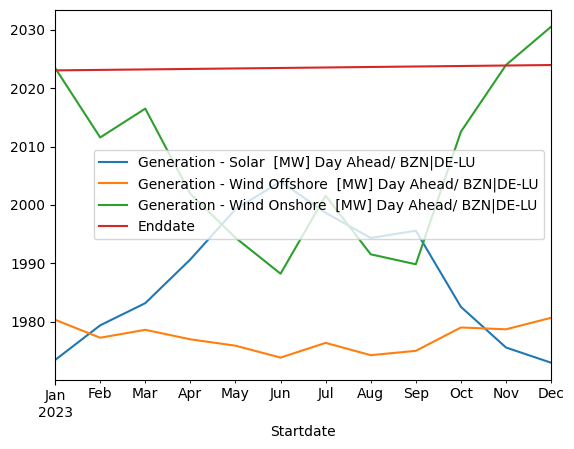

In [102]:
# make a grouped plot of the generation data
generation = generation.set_index('Startdate')
generation.resample('M').mean().plot()
plt.show()

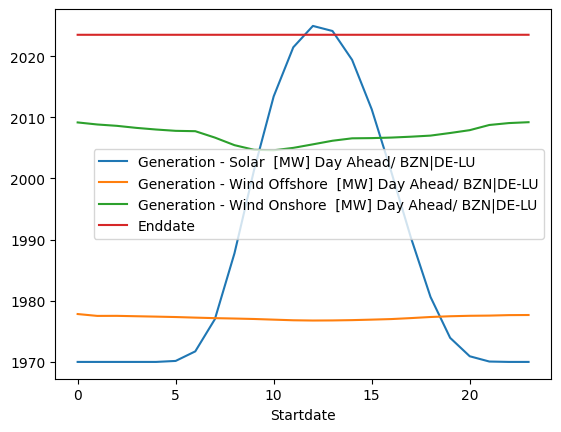

In [103]:
#same plot for day
generation.groupby(generation.index.hour).mean().plot()
plt.show()

In [107]:
#do the same for laod data
load = pd.read_csv('../Data/load.csv')
print(load.head())

#split first column into two date and time columns
load[['Startdate','Enddate']] = load['Time (CET/CEST)'].str.split('-', expand=True)
#delete spaces at the start or end of the columns
load['Startdate'] = load['Startdate'].str.strip()
load['Enddate'] = load['Enddate'].str.strip()

#convert date columns to datetime
load['Startdate'] = pd.to_datetime(load['Startdate'], format='%d.%m.%Y %H:%M')
load['Enddate'] = pd.to_datetime(load['Enddate'], format='%d.%m.%Y %H:%M')

#drop original date column
load = load.drop(columns='Time (CET/CEST)')

                       Time (CET/CEST)  \
0  01.01.2023 00:00 - 01.01.2023 00:15   
1  01.01.2023 00:15 - 01.01.2023 00:30   
2  01.01.2023 00:30 - 01.01.2023 00:45   
3  01.01.2023 00:45 - 01.01.2023 01:00   
4  01.01.2023 01:00 - 01.01.2023 01:15   

   Day-ahead Total Load Forecast [MW] - BZN|DE-LU  \
0                                         43046.0   
1                                         42577.0   
2                                         41937.0   
3                                         41302.0   
4                                         40841.0   

   Actual Total Load [MW] - BZN|DE-LU  
0                             39287.0  
1                             38961.0  
2                             38831.0  
3                             38648.0  
4                             38279.0  


In [117]:
#merge all data in a single dataframe
data = pd.merge(prices, generation, on='Startdate')
data = pd.merge(data, load, on='Startdate')

#keep only one startdate column
data = data.drop(columns='Enddate_x')
data = data.drop(columns='Enddate_y')

data = data.drop(columns='BZN|DE-LU')
data = data.drop(columns='Currency')

#rename columns to easier names
data = data.rename(columns={'Day-ahead Price [EUR/MWh]':'Price'})
data = data.rename(columns={'Generation - Wind Offshore  [MW] Day Ahead/ BZN|DE-LU':'Wind offshore forecast'})
data = data.rename(columns={'Generation - Wind Onshore  [MW] Day Ahead/ BZN|DE-LU':'Wind onshore forecast'})
data = data.rename(columns={'Generation - Solar  [MW] Day Ahead/ BZN|DE-LU':'Solar forecast'})
data = data.rename(columns={'Actual Total Load [MW] - BZN|DE-LU':'Actual Load'})
data = data.rename(columns={'Day-ahead Total Load Forecast [MW] - BZN|DE-LU':'Load forecast'})

#save data to a new csv file
data.to_csv('../Data/merged_data.csv', index=False)